<a href="https://colab.research.google.com/github/vibhaa24/YouTube-Comment-Analysis/blob/main/copy_of_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving YoutubeCommentsDataSet_Cleaned.csv to YoutubeCommentsDataSet_Cleaned.csv


In [5]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [6]:
# Step 2: Load the dataset
df = pd.read_csv('/content/YoutubeCommentsDataSet_Cleaned.csv')


In [7]:
# Step 3: Check for missing values and drop them
df.dropna(inplace=True)

In [8]:
# Step 4: Convert categorical target labels to numerical format (if needed)
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['Sentiment'] = df['Sentiment'].map(sentiment_mapping)

In [9]:
# Step 5: Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['Sentiment'], test_size=0.2, random_state=42)

In [10]:
# Step 6: Convert text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Max 5000 words considered
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
# Step 7: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Step 8: Make predictions
y_pred = model.predict(X_test_tfidf)

In [13]:
# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.31      0.43       478
           1       0.62      0.60      0.61       883
           2       0.80      0.91      0.85      2208

    accuracy                           0.75      3569
   macro avg       0.70      0.61      0.63      3569
weighted avg       0.74      0.75      0.73      3569



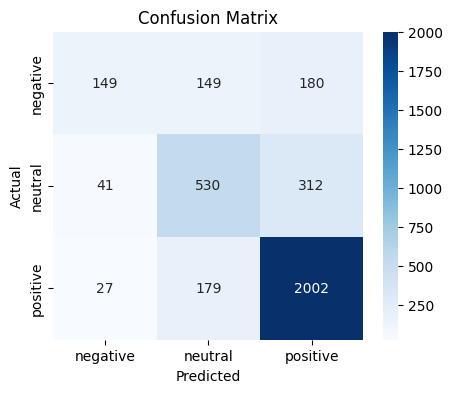

In [14]:
# Step 10: Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=sentiment_mapping.keys(), yticklabels=sentiment_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

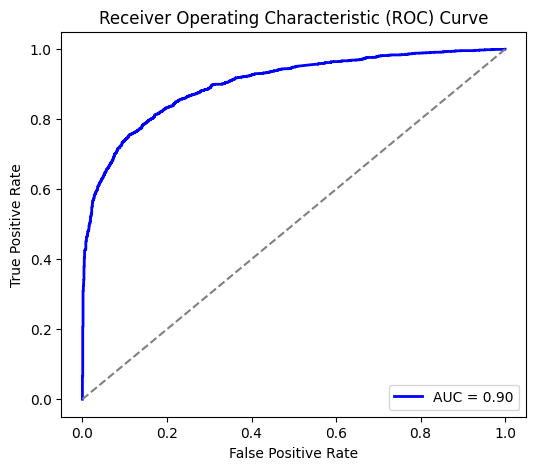

In [21]:
# Step 11: Generate and plot the ROC Curve
y_prob = model.predict_proba(X_test_tfidf)  # Get probability estimates

# Since it's a multi-class classification, focus on positive sentiment (class 2)
y_test_binary = (y_test == 2).astype(int)  # Convert to binary: 1 if positive, 0 otherwise
y_prob_positive = y_prob[:, 2]  # Probability of being positive

# Compute ROC curve and AUC score
fpr, tpr, _ = roc_curve(y_test_binary, y_prob_positive)
auc_score = roc_auc_score(y_test_binary, y_prob_positive)

# Plot ROC Curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', linewidth=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



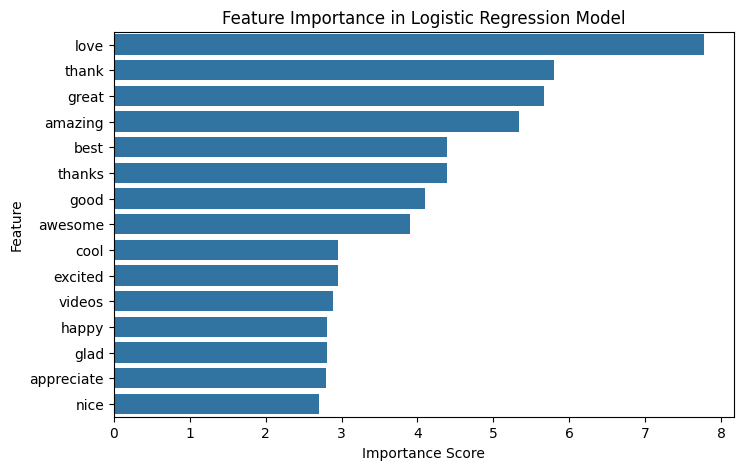

In [20]:
# Step 12: Extract and Plot Feature Importance
feature_importance = model.coef_[2]  # Get coefficients for positive class
feature_names = vectorizer.get_feature_names_out()

# Create a dataframe for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)  # Top 15 features

# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(y=importance_df['Feature'], x=importance_df['Importance'], orient='h')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Logistic Regression Model')
plt.show()